In [1]:
# importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# getting the information needed from yahoo finance
# this includes Microsoft and Sony's stock shares
msft = yf.Ticker("MSFT")
sony = yf.Ticker("SONY")

msftDF = msft.history(period='1d', start='2010-1-1', end='2022-1-25')
sonyDF = sony.history(period='1d', start='2010-1-1', end='2022-1-25')

msftDF.to_csv("msft.csv")
sonyDF.to_csv("sony.csv")


In [3]:
# getting daily data on 'business days only' in both time series
msftDF = msftDF.asfreq('B')
sonyDF = sonyDF.asfreq('B')

# dealing with the NaN
# we will use linear interpolation becuase it estimates the values based on near values
msftDF = msftDF.interpolate()
sonyDF = sonyDF.interpolate()

# we also drop Dividends and Stock Splits becuase they're all zero!
msftDF = msftDF.drop(["Dividends", "Stock Splits"], axis=1)
sonyDF = sonyDF.drop(["Dividends", "Stock Splits"], axis=1)

In [4]:
# re-indexing both time series to match the same time periods
common_date_range = msftDF.index.union(sonyDF.index)
msftDF = msftDF.reindex(common_date_range)
sonyDF = sonyDF.reindex(common_date_range)

In [5]:
# Data Normalization
# we will use Z-score normalization for this data becuase we're using the financial data of two companies to predict their future performance
# this method scales the data to have zero mean and unit variance.
msftDF_normalized = (msftDF - msftDF.mean()) / msftDF.std()
sonyDF_normalized = (sonyDF - sonyDF.mean()) / sonyDF.std()



In [6]:
# Stationarity Transformation by differencing original data
msftDF_diff = msftDF.diff()
sonyDF_diff = sonyDF.diff()

# Stationarity Transformation by differencing normalized data
msftDF_diff = msftDF_normalized.diff()
sonyDF_diff = sonyDF_normalized.diff()

In [7]:
# analyzing trends?

# rolling_mean = msftDF['Volume'].rolling(window=50).mean()
# plt.plot(msftDF["Open"], msftDF['Volume'])
# plt.plot(msftDF["Open"], rolling_mean)
# plt.title('Time Series Plot with Trend')
# plt.xlabel('Open')
# plt.ylabel('Volume')
# plt.show()

In [8]:
# analyzing seasonality?

# fft = np.fft.fft(msftDF['Volume'])
# magnitude = np.abs(fft)
# frequency = np.linspace(0, 1, len(magnitude))

# plt.plot(frequency[:len(magnitude)//2], magnitude[:len(magnitude)//2])
# plt.title('Frequency Spectrum Plot')
# plt.xlabel('Frequency')
# plt.ylabel('Magnitude')
# plt.show()

In [9]:
# Descriptive statistics
# mean
print(msftDF.describe().mean(), 2*"\n", sonyDF.describe().mean())

Open      4.800178e+02
High      4.810274e+02
Low       4.792651e+02
Close     4.798975e+02
Volume    6.141421e+07
dtype: float64 

 Open      4.327127e+02
High      4.328915e+02
Low       4.318638e+02
Close     4.320695e+02
Volume    5.265463e+06
dtype: float64


In [10]:
# median
print(msftDF.describe().median(), 2*"\n", sonyDF.describe().median())

Open      7.981666e+01
High      8.056592e+01
Low       7.903810e+01
Close     7.984765e+01
Volume    2.825290e+07
dtype: float64 

 Open      3.635923e+01
High      3.657839e+01
Low       3.609286e+01
Close     3.633968e+01
Volume    1.287757e+06
dtype: float64


In [11]:
# variance
print(msftDF.describe().var(), 2*"\n", sonyDF.describe().var())

Open      1.170922e+06
High      1.170365e+06
Low       1.171439e+06
Close     1.170924e+06
Volume    1.110299e+16
dtype: float64 

 Open      1.203409e+06
High      1.203251e+06
Low       1.204034e+06
Close     1.203856e+06
Volume    1.479893e+14
dtype: float64


In [12]:
# std
print(msftDF.describe().std(), 2*"\n", sonyDF.describe().std())

Open      1.082091e+03
High      1.081834e+03
Low       1.082330e+03
Close     1.082093e+03
Volume    1.053707e+08
dtype: float64 

 Open      1.097000e+03
High      1.096928e+03
Low       1.097285e+03
Close     1.097204e+03
Volume    1.216508e+07
dtype: float64


In [13]:
# calculating the correlation coefficient
print("msft")
print(msftDF.corr())

print("sony")
print(sonyDF.corr())

msft
            Open      High       Low     Close    Volume
Open    1.000000  0.999923  0.999904  0.999829 -0.319428
High    0.999923  1.000000  0.999865  0.999902 -0.316966
Low     0.999904  0.999865  1.000000  0.999912 -0.322671
Close   0.999829  0.999902  0.999912  1.000000 -0.320168
Volume -0.319428 -0.316966 -0.322671 -0.320168  1.000000
sony
            Open      High       Low     Close    Volume
Open    1.000000  0.999931  0.999898  0.999842 -0.294185
High    0.999931  1.000000  0.999879  0.999915 -0.291503
Low     0.999898  0.999879  1.000000  0.999930 -0.296837
Close   0.999842  0.999915  0.999930  1.000000 -0.294173
Volume -0.294185 -0.291503 -0.296837 -0.294173  1.000000


In [14]:
# cross-correlation between two time series
result = msftDF.corrwith(sonyDF)
result

Open      0.965862
High      0.965875
Low       0.965867
Close     0.965850
Volume    0.150645
dtype: float64

In [15]:
#calculate simple moving average using previous 3 time periods
n = 3
msftDF['SMA30'] = msftDF['Close'].rolling(n).mean()
msftDF

,Open,High,Low,Close,Volume,SMA30
Date,,,,,,
2010-01-04 00:00:00-05:00,23.321034,23.686614,23.298184,23.572371,38409100.0,NaN
2010-01-05 00:00:00-05:00,23.496207,23.686613,23.336264,23.579985,49749600.0,NaN
2010-01-06 00:00:00-05:00,23.519048,23.671374,23.244864,23.435270,58182400.0,23.529209
2010-01-07 00:00:00-05:00,23.328649,23.381964,22.993534,23.191557,50559700.0,23.402271
2010-01-08 00:00:00-05:00,23.062080,23.519055,23.031614,23.351498,51197400.0,23.326108
...,...,...,...,...,...,...
2022-01-18 00:00:00-05:00,299.839128,305.489381,297.541532,298.438873,42333200.0,302.161377
2022-01-19 00:00:00-05:00,302.028303,309.542274,298.488258,299.109467,45933900.0,299.903239
2022-01-20 00:00:00-05:00,304.769535,307.313623,296.949882,297.403473,35380700.0,298.317271


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

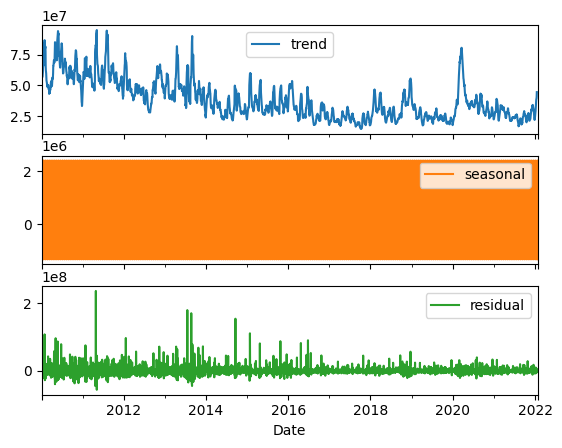

In [16]:
# one way of doing seasonal decomposition
def seasonal_decompose(df, column, freq):
    """
    Decompose a time series into trend, seasonal, and residual components.
    
    :param df: DataFrame with DatetimeIndex
    :param column: name of the column to decompose
    :param freq: frequency of the seasonal component
    :return: DataFrame with the trend, seasonal, and residual components
    """
    # Compute the trend component using a rolling average
    trend = df[column].rolling(window=freq, center=True).mean()
    
    # Detrend the time series
    detrended = df[column] - trend
    
    # Compute the seasonal component using a groupby
    seasonal = detrended.groupby(detrended.index.month).mean()
    
    # Repeat the seasonal component to match the length of the original time series
    seasonal = np.tile(seasonal, len(df) // len(seasonal) + 1)[:len(df)]
    
    # Compute the residual component
    residual = detrended - seasonal
    
    # Return the components as a DataFrame
    return pd.DataFrame({'trend': trend, 'seasonal': seasonal, 'residual': residual})


result = seasonal_decompose(msftDF, 'Volume', 12)
result.plot(subplots=True)


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

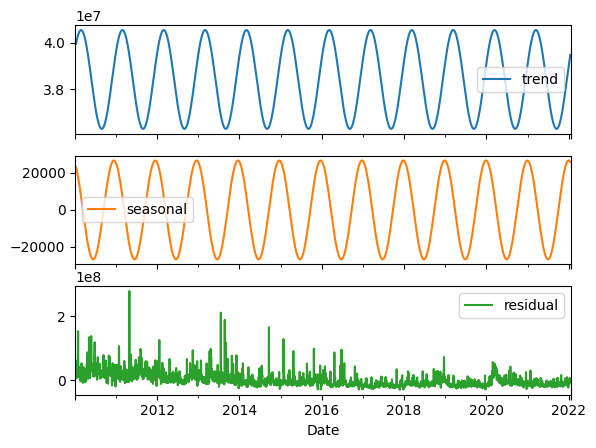

In [18]:
# another way of implementing seasonal decomposition

def seasonal_decompose_fourier(df, column, freq):
    """
    Decompose a time series into trend, seasonal, and residual components using Fourier analysis.
    
    :param df: DataFrame with DatetimeIndex
    :param column: name of the column to decompose
    :param freq: frequency of the seasonal component
    :return: DataFrame with the trend, seasonal, and residual components
    """
    # Compute the Fourier transform of the time series
    fft = np.fft.rfft(df[column])
    
    # Zero out all frequencies except for the first (DC component) and the seasonal frequency
    fft[1:freq] = 0
    fft[freq + 1:] = 0
    
    # Compute the inverse Fourier transform to obtain the trend and seasonal components
    trend_seasonal = np.fft.irfft(fft)
    
    # Compute the trend component using a rolling average
    trend = pd.Series(trend_seasonal, index=df.index).rolling(window=freq, center=True).mean()
    
    # Compute the seasonal component
    seasonal = trend_seasonal - trend
    
    # Compute the residual component
    residual = df[column] - trend - seasonal
    
    # Return the components as a DataFrame
    return pd.DataFrame({'trend': trend, 'seasonal': seasonal, 'residual': residual})

result = seasonal_decompose_fourier(msftDF, 'Volume', 12)
result.plot(subplots=True)
